# Co-clustering in python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [79]:
dataset = pd.read_table("dataset_v2.tsv")

In [80]:
dataset.head()

,MERS,SARS,SARS.CoV.2,H5N1,H7N9
CCL2,0,3,3,2,3
CCL3,0,0,3,0,0
CCL4,0,0,3,3,3
CCL5,0,0,1,3,0
CCL8,0,0,3,0,0


In [81]:
cmap= [[255,255,255],[100,149,237],[178,58,238],[238,106,80]]

In [82]:
for i in range(len(cmap)):
    cmap[i][0] = cmap[i][0]/255
    cmap[i][1] = cmap[i][1]/255
    cmap[i][2] = cmap[i][2]/255

In [83]:
cmap

[[1.0, 1.0, 1.0],
 [0.39215686274509803, 0.5843137254901961, 0.9294117647058824],
 [0.6980392156862745, 0.22745098039215686, 0.9333333333333333],
 [0.9333333333333333, 0.41568627450980394, 0.3137254901960784]]

In [84]:
col_colors = {"MERS":[255,204,255],"SARS":[204,255,204],"SARS.CoV.2":[0,255,102],"H5N1":[204,204,255],"H7N9":[230,159,0]}

In [85]:
for i in col_colors:
    col_colors[i][0] = col_colors[i][0]/255
    col_colors[i][1] = col_colors[i][1]/255
    col_colors[i][2] = col_colors[i][2]/255

In [86]:
col_colors = pd.Series(col_colors)

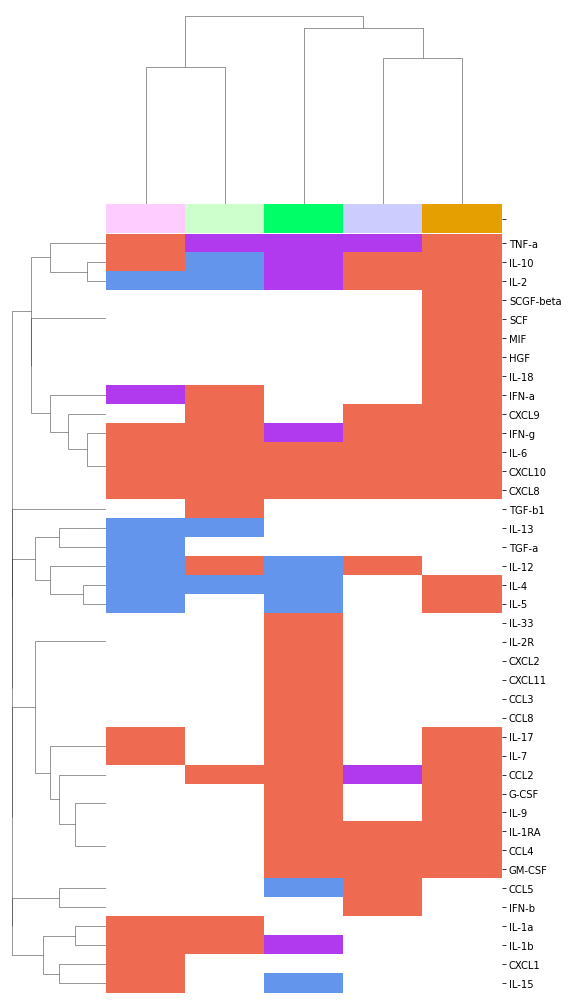

In [98]:
g = sns.clustermap(dataset, metric="jaccard", method="complete", cmap=cmap, col_colors=col_colors,cbar_pos= None, figsize=(8,14),
                  xticklabels=False)

In [99]:
g.savefig("clustermap_python_complete_linkage.png")

In [59]:
from sklearn.cluster import SpectralCoclustering
from sklearn.metrics import consensus_score

In [73]:
model = SpectralCoclustering(n_clusters=5, random_state=0)

In [74]:
model.fit(dataset)

SpectralCoclustering(init='k-means++', mini_batch=False, n_clusters=5,
                     n_init=10, n_jobs=None, n_svd_vecs=None, random_state=0,
                     svd_method='randomized')

In [75]:
score = consensus_score(model.biclusters_,
                        (rows[:, row_idx], columns[:, col_idx]))

print("consensus score: {:.3f}".format(score))

NameError: name 'rows' is not defined

In [76]:
model.row_labels_
model.column_labels_

array([2, 4, 1, 3, 0, 2])

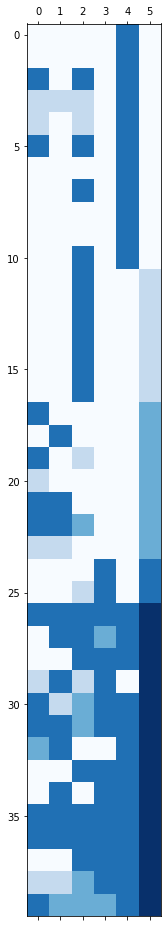

In [77]:
fit_data = dataset
fit_data["clusters"] = model.row_labels_

fit_data = fit_data.sort_values(by=['clusters'])
plt.matshow(fit_data, cmap=plt.cm.Blues)